# Sample Space and Random Variables

> Inspired by: [MIT Open Course](https://ocw.mit.edu/courses/res-6-012-introduction-to-probability-spring-2018/)

## Common packages

In [1]:
import jax  # numpy on steroids: autograd, GPU/TPU acceleration and other tricks
import jax.numpy as jnp  # jax's own numpy
import distrax  # distributions in jax

## What is a Sample Space?

> A **set** of all possible outcomes of an experiment. Notation: $\Omega$
1. Mutually exclusive - only one outcome should be possible at the end of an experiment
2. Collectively exhaustive - togather, elements of sample space exhaust all the possible outcomes of an experiment
3. Right granularity - Example: Coin toss in a rainy season.

## Programmatically constructing sample space

1. Draw sufficiently many samples from an experiment (exhaustive)
2. Consider only unique outcomes (a set of all outcomes)

## Example 1: Coin toss
$\Omega = \{H, T\}$

* Head ($H$) $\to 1$
* Tail ($T$) $\to 0$

$\Omega = \{1, 0\}$

In [2]:
# Instantiate a Bernolli distribution
coin = distrax.Bernoulli(probs=0.8)  # probability of "Head" is 0.8

In [3]:
key = jax.random.PRNGKey(0)
n_samples = 20

# Sample from the distribution
samples = coin.sample(seed=key, sample_shape=n_samples)
print(f"Samples:\n{samples}")

Samples:
[0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1]


In [4]:
sample_space = jnp.unique(samples)
print(f"Sample Space: {sample_space}")

Sample Space: [0 1]


## Example 2: Tossing two coins

In [5]:
two_coins = distrax.Bernoulli(probs=(0.5, 0.6))

In [6]:
key = jax.random.PRNGKey(0)
n_samples = 10

# Sample from the distribution
samples = two_coins.sample(seed=key, sample_shape=n_samples)
print(f"Samples:\n{samples}")

Samples:
[[0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]]


In [7]:
sample_space = jnp.unique(samples, axis=0)
print(f"Sample Space:\n{sample_space}")

Sample Space:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]


## What is an Event?
> An event is a subset of the sample space

Experiment: Tossing two coins

Event: "At least one Head": $\{(0, 1), (1, 0), (1, 1)\}$

## Example 3: Roll a die 

In [8]:
die = distrax.Categorical(probs=[1/6]*6)
die.num_categories

6

In [9]:
key = jax.random.PRNGKey(0)
n_samples = 20

# Sample from the distribution
samples = die.sample(seed=key, sample_shape=n_samples)
print(f"Samples:\n{samples}")

Samples:
[2 1 1 3 4 2 4 2 5 5 0 0 4 5 1 1 4 1 0 5]


In [10]:
sample_space = set(samples.tolist())
print(f"Sample Space: {sample_space}")

Sample Space: {0, 1, 2, 3, 4, 5}


Q: What could be an example event in a die roll?

A: "all outcomes with even numbers"

## Example 4: Roll two dice

In [11]:
dice = distrax.Categorical(probs=[[1/4]*6, [1/4]*6])
dice.num_categories

6

In [12]:
dice.batch_shape

(2,)

In [13]:
key = jax.random.PRNGKey(1)
n_samples = 3000

# Sample from the distribution
samples = dice.sample(seed=key, sample_shape=n_samples)

In [14]:
sample_space = jnp.unique(samples, axis=0)
print(f"Sample Space: {sample_space.tolist()}")

Sample Space: [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5]]


## Discrete Sample Space

* Countable outcomes

An experiment: You count number of stars in the sky every evening before you sleep.

Q: Will this experiment have a discrete sample space?

A: Yes, because all the outcomes are countably infinite.

## Continuous Sample Space

* DefinitionL: It contains the outcomes that are not countable but can be defined within a range.

## Example 5: Dart Throw

![](https://upload.wikimedia.org/wikipedia/commons/f/fb/Darts_in_a_dartboard.jpg)

## Consider a square board for our experiment (but why?)

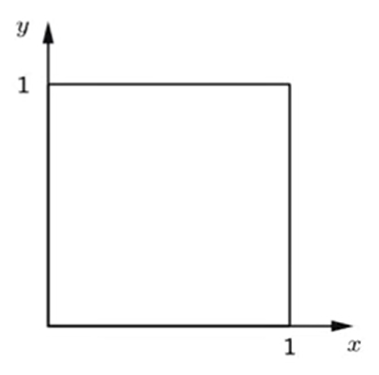

In [15]:
import matplotlib.pyplot as plt
dart_throw = distrax.Uniform(low=(0.0, 0.0), high=(1.0, 1.0))

In [16]:
key = jax.random.PRNGKey(0)
n_samples = 5000

# Sample from the distribution
samples = dart_throw.sample(seed=key, sample_shape=n_samples)
print(f"Samples:\n{samples}")

Samples:
[[0.91878176 0.5988804 ]
 [0.01619005 0.6148746 ]
 [0.8741435  0.26158714]
 ...
 [0.5804421  0.48235536]
 [0.7156378  0.53015876]
 [0.91583014 0.75922954]]


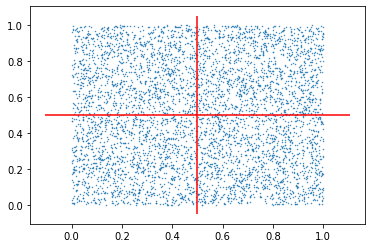

In [17]:
plt.scatter(samples[:,0], samples[:,1], s=0.2)
plt.vlines(0.5, *plt.xlim(), color='r')
plt.hlines(0.5, *plt.ylim(), color='r');

Let us check the number of outcomes falling within the 3rd quadrant. Ideally, they should be 1/4 of the total samples.

In [18]:
jnp.sum(jnp.sum(samples < 0.5, axis=1) == 2)

DeviceArray(1234, dtype=int32)

* Sample space: $\{(x, y)| 0 \le x,y \le 1\}$

Q: What is an event in Darts game?

A: "all the darts falling within a particular area. For example, in first quadrant."

## Event in continuos sample space

In the following image of a continuous space, $A$ can be considered a event enclosing a particular area.

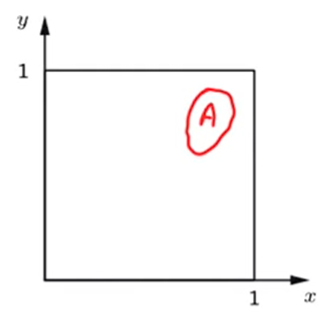

## Probability Axioms

Recall: Sample space $\to \Omega$

* $p(\Omega) = 1$
* $0 \lt p(event) \le 1$
* If $A \cap B = \phi$ then $p(A \cup B) = p(A) + p(B)$

## Questions

Q: Is $\Omega$ an event?

A: Yes

Q: What is the probability that you will hit a perticular point on a dart-board?

A: Almost 0. Mathematically, tends to 0.

Q: Consider the following paradox for the dart-board: $1=P(\Omega)=P(U\{(x, y)\})=\sum P(\{(x, y)\})=\sum 0=0$

A: Remember Limits!

## What is a Random Variable?
> A function that maps our experimental outcome to a numerical value.

## Example 1: Coin toss

$$
C(\omega)= \begin{cases}100, & \text { if } \omega=\text { heads } \\ -20, & \text { if } \omega=\text { tails }\end{cases}
$$

In [19]:
key = jax.random.PRNGKey(0)
n_samples = 5

# Sample from the distribution
samples = coin.sample(seed=key, sample_shape=n_samples)
print(samples)

[1 1 1 0 1]


In [20]:
# This function does not work with JAX
# def rv_coin_func(x):
#     if x==1:
#         return 100
#     else: 
#         return -20

def rv_coin_func(x):
    return jax.lax.cond(x==1, lambda: 100, lambda: -20)

rv_coin_samples = jax.vmap(rv_coin_func)(samples)
print(rv_coin_samples)

[100 100 100 -20 100]


In [21]:
print(type(samples))
print(type(rv_coin_samples))

<class 'jaxlib.xla_extension.DeviceArray'>
<class 'jaxlib.xla_extension.DeviceArray'>


## Example 2: Sum of two dice rolls

* $X(\omega) = \omega, \text{ where } \omega \text{ can take any value from 1 to 6}$
* $Y(\omega) = \omega, \text{ where } \omega \text{ can take any value from 1 to 6}$
* $Z = X + Y$

$Z$ can take any value from $2$ to $12$.

In [22]:
def Z(sample):
    return jnp.sum(sample)

key = jax.random.PRNGKey(1)
n_samples = 2

# Sample from the distribution
samples = dice.sample(seed=key, sample_shape=n_samples)
rv_samples = jax.vmap(Z)(samples)

print(f"Samples:\n{samples}")
print(f"RV Samples:\n{rv_samples}")

Samples:
[[2 5]
 [5 4]]
RV Samples:
[7 9]


## Discrete Random Variables

Quick Quiz: Is $C$ a discrete random variable?

$$
C(\omega)= \begin{cases}1.5, & \text { if } \omega=\text { heads } \\ 2.5, & \text { if } \omega=\text { tails }\end{cases}
$$

A: Yes, because it has countably finite sample space.

## Example 1: A student's score in an exam

* No negative marking.
* Sample space = \{0, 1, 2, ..., 100\}
* Random variable: $S(\omega) = \omega, \omega \text{ is marks received}$

## Continuous Random Variables

* Functions defined over a range.

## Examples:

* Weights of all human beings on this planet (include past, present and future).
* Time taken to blow a baloon by a person.

## Programmatic example: Absolute errors

* Experiment: Errors in manufacturing 1000 mm diameter pipes 

In [23]:
def abs_rv_func(x):  # RV function
    return jnp.abs(x)

error = distrax.Uniform(low=-10.0, high=10.0)
n_samples = 5

key = jax.random.PRNGKey(0)
samples = error.sample(seed=key, sample_shape=n_samples).round(2)

print(f"Samples: {samples}")
print(f"RV samples: {jax.tree_map(abs_rv_func, samples)}")

Samples: [ 1.49      -8.01      -2.1399999  7.8799996  1.93     ]
RV samples: [1.49      8.01      2.1399999 7.8799996 1.93     ]


## Probability Mass Function (for discrete random variables)

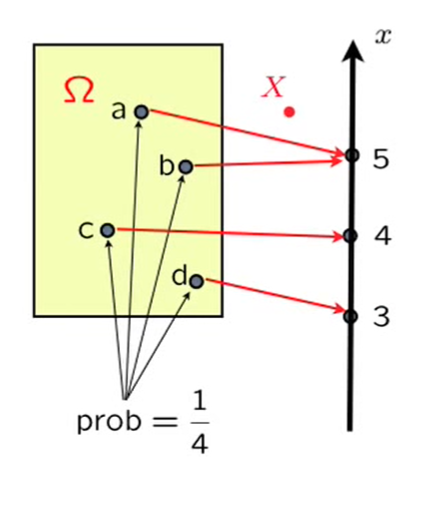

* $p(X=5) = \frac{1}{2}$
* $p(X=4) = \frac{1}{4}$
* $p(X=3) = \frac{1}{4}$

## A programmatic example of PMF (for discrete random variables)

In [24]:
coin = distrax.Bernoulli(probs=0.8)

In [25]:
print(f"Probability of 1: {coin.prob(1):.3f}")
print(f"Probability of 0: {coin.prob(0):.3f}")

Probability of 1: 0.800
Probability of 0: 0.200


In [26]:
print(f"Log probability of 1: {coin.log_prob(1):.3f}")
print(f"Log probability of 0: {coin.log_prob(0):.3f}")

Log probability of 1: -0.223
Log probability of 0: -1.609


### Probability Density Function

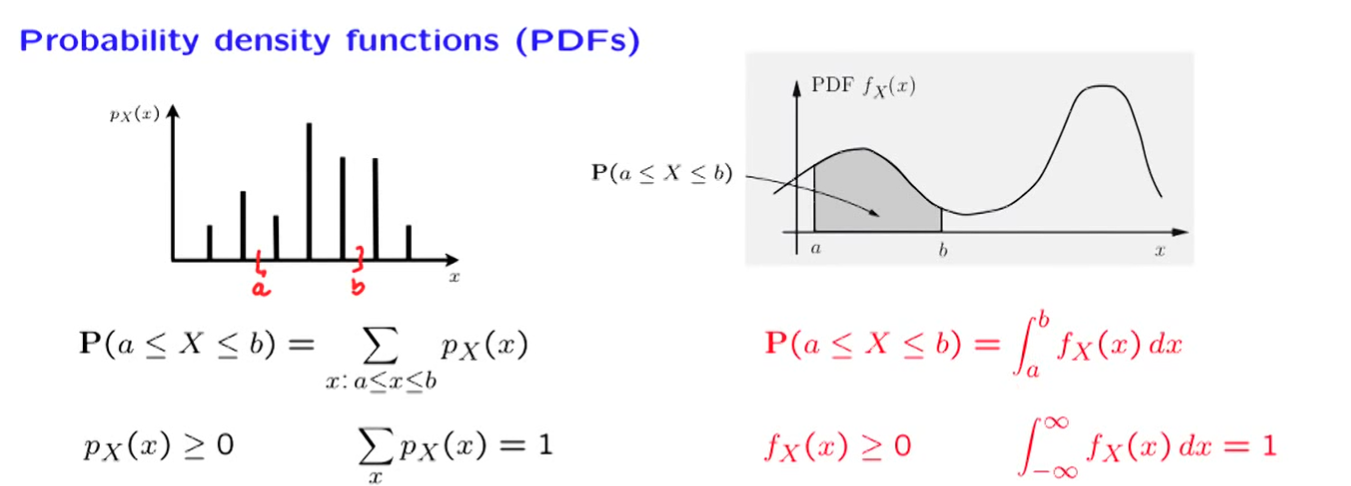

## A programmatic example for PDF (for continuous random variables)

In [27]:
errors = distrax.Uniform(low=1.0, high=2.0)

In [28]:
print(errors.prob(0.5))

0.0


In [29]:
print(errors.prob(1.5))

1.0


In [30]:
print(errors.prob(2.0))

1.0


## Summary

We learned about the following concepts:

* Sample space and their types (Discrete and Continuous)
* Events
* Random Variables and their types (Discrete and Continuous)
* How to implement above concepts using `JAX` and `Distrax`